# Data Mining / Prospecção de Dados


## Sara C. Madeira and André Falcão, 2019/20

# Project 1 - Pattern Mining

## Ivo Pascoal - 55056
## Miguel Almeida - 55055

## Logistics

**In a "normal" scenario students should work in teams of 2 people. Due to the social distance imposed by current public health situation, students were allowed to work in groups of 1 and 3. In this context, the amount of work was adapted according to the number of students in groups as described below.**

* Task **1.** should be done by **all** groups
* Task **2.1.** should be done by **all** groups
* Task **2.2.** should be done only by **groups of 2 and 3** students
* Task **2.3** should be done only by **groups of 2 and 3** students
* Task **2.4** should be done only by **groups of 3** students
* Task **2.5** should be done only by **groups of 3** students

The quality of the project will then dictate its grade.

**The project's solution should be uploaded in Moodle before the end of April, 26th 2020 (23:59).** 

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. Note that you can use `PD_201920_Project.ipynb`as template.**

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 

**Decisions should be justified and results should be critically discussed.**

## Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[MLxtend](http://rasbt.github.io/mlxtend/)**. When using MLxtend, frequent patterns can either be discovered using `Apriori` and `FP-Growth`. **Choose the pattern mining algorithm to be used.** 

The dataset to be analysed is **`Foodmart_2020_PD.csv`**, a modified version of the [Foodmart 2000(2005) dataset](https://github.com/neo4j-examples/neo4j-foodmart-dataset/tree/master/data). 

**`Foodmart_2020_PD.csv`** stores **69549 transactions** from **24 stores**, where **103 different products** can be bought. Each transaction (row) has a STORE_ID (integer from 1 to 24), and a list of produts (items), together with the quantities bought. In the transation highlighted below, a customer bought 1 unit of soup, 2 of cheese and 1 of wine at store 2.

<img src="Foodmart_2020_PD_Example.png" alt="Foodmart_2020_PD_Example" style="width: 1000px;"/>

**In what follows keep the following question in mind and be creative!**

1. What are the most popular products?
2. Which products are bought together?
3. Can you find associations highliting that when people buy a product/set of products also buy other product(s)?

## 1. Mining Frequent Itemsets and Association Rules: Ignoring Product Quantities and Stores

In this first part of the project you should load and preprocessed the dataset **`Foodmart_2020_PD.csv`** in order to compute frequent itemsets and generate association rules considering all the transactions, regardeless of the store, and ignoring product quantities.

In [1]:
import matplotlib.pyplot as plt
def print_sup_conf(rules):
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title('Support vs Confidence')
    plt.show()
    
def print_sup_lift(rules):
    plt.scatter(rules['support'], rules['lift'], alpha=0.5)
    plt.xlabel('support')
    plt.ylabel('lift')
    plt.title('Support vs Lift')
    plt.show()
    
def print_lift_conf(rules):
    fit = np.polyfit(rules['lift'], rules['confidence'], 1)
    fit_fn = np.poly1d(fit)
    plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
     fit_fn(rules['lift']))
    plt.xlabel('lift')
    plt.ylabel('confidence')
    plt.title('Confidence vs Lift')
    plt.show()
    
def print_plt(rules):
    print_sup_conf(rules)
    print_sup_lift(rules)
    print_lift_conf(rules)

### 1.1. Load and Preprocess Dataset

 **Product quantities and stores should not be considered.**

Começamos por editar o ficheiro csv manualmente visto que tinha alguns erros. As estratégias de deteção e de adaptação foram detectar as linhas onde faltavam virgulas através do codigo apresentado a baixo que compara o número de caracteres '=' e de ','  

In [2]:
f = open("Foodmart_2020_PD.csv", "r")
i= 0

print("Linhas com erro: ")
for x in f:
    i+=1
    counter1 = x.count('=') 
    counter2 = x.count(',') 
    if counter1 != (counter2+1):
        print(" - ",i, ":", counter1-counter2-1)

Linhas com erro: 
 -  144 : 1
 -  310 : 1
 -  23279 : 1
 -  23282 : 1
 -  23284 : 1
 -  23285 : 1
 -  23308 : 1
 -  23309 : 1
 -  23312 : 1
 -  23315 : 1
 -  23316 : 1
 -  23334 : 1
 -  23337 : 1
 -  23341 : 1
 -  23342 : 1
 -  23344 : 1
 -  23351 : 1
 -  23352 : 1
 -  23357 : 1
 -  23361 : 1
 -  23378 : 1
 -  23387 : 1
 -  23390 : 1
 -  23391 : 1
 -  23395 : 1
 -  23396 : 1
 -  23410 : 1
 -  23412 : 1
 -  23417 : 1
 -  23423 : 1
 -  23442 : 1
 -  23443 : 1
 -  23447 : 1
 -  23458 : 1
 -  23459 : 1
 -  23467 : 1
 -  23471 : 1
 -  23473 : 1
 -  23474 : 1
 -  23479 : 1
 -  23481 : 1
 -  23486 : 1
 -  23499 : 1
 -  23502 : 1
 -  23503 : 1
 -  23510 : 1
 -  23512 : 1
 -  23518 : 1
 -  23523 : 1
 -  23533 : 1
 -  23534 : 1
 -  24471 : -1
 -  27063 : -1
 -  31249 : -1
 -  31618 : -1
 -  34572 : -1
 -  34998 : -1
 -  41572 : -1
 -  41998 : -1
 -  53770 : -1
 -  63603 : -1
 -  65654 : 1
 -  65666 : 1
 -  65685 : 1
 -  66263 : -1
 -  66264 : -1
 -  66265 : -1
 -  66266 : -1
 -  66267 : -1
 -  6

Foram acrescentadas virgulas em todas as linhas que faltavam e para a inserção das stores que faltavam assumimos que seria os valores continuos das lojas seguintes. 

Import do csv corrigido

In [3]:
#Csv para Dataframe
import csv
import pandas as pd

with open('Cleaned_Foodmart_2020_PD.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    data = list(spamreader)

df = pd.DataFrame(data)


Remover as quantidades dos produtos

In [4]:
for x in range(1,14):

    df[x] = df[x].str.split("=", n = 1, expand = True)
    
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,STORE_ID=2,Pasta,Soup,None,None,None,None,None,None,None,None,None,None,None
1,STORE_ID=2,Soup,Fresh Vegetables,Milk,Plastic Utensils,None,None,None,None,None,None,None,None,None
2,STORE_ID=2,Cheese,Deodorizers,Hard Candy,Jam,None,None,None,None,None,None,None,None,None
3,STORE_ID=2,Fresh Vegetables,None,None,None,None,None,None,None,None,None,None,None,None
4,STORE_ID=2,Cleaners,Cookies,Eggs,Preserves,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69544,STORE_ID=24,Fresh Vegetables,Deli Meats,Flavored Drinks,Beer,Personal Hygiene,Lightbulbs,Computer Magazines,None,None,None,None,None,None
69545,STORE_ID=24,Cleaners,Eggs,Fresh Fruit,Muffins,Tools,Sour Cream,Wine,None,None,None,None,None,None
69546,STORE_ID=24,Soup,Fresh Vegetables,Donuts,None,None,None,None,None,None,None,None,None,None
69547,STORE_ID=24,Flavored Drinks,Waffles,Canned Vegetables,Frozen Chicken,None,None,None,None,None,None,None,None,None


Contagem da quantidade de itens diferentes (102)

In [5]:
import numpy as np

aux = df[1]
for x in range(2,14):
    aux = aux.append(df[x])

In [6]:
aux =  list(dict.fromkeys(aux))
aux.remove(None)

In [7]:
len(aux)

102

Criação de um DataFrame com todos os produtos 

In [8]:
df_enconded = pd.DataFrame(aux)

def custom(df):
    
    encoded_vals = []
    for index, row in df.iterrows():
        labels = {}
        uncommons = list(set(aux) - set(row))
        commons = list(set(aux).intersection(row))
        for uc in uncommons:
            labels[uc] = 0
        for com in commons:
            labels[com] = 1
        encoded_vals.append(labels)
    encoded_vals[0]
    ohe_df = pd.DataFrame(encoded_vals)
    
    return ohe_df
ohe_df = custom(df)
ohe_df

,Nasal Sprays,Fresh Fruit,Sports Magazines,Rice,Pot Cleaners,Tofu,Eggs,Conditioner,Chips,Bagels,...,Popsicles,Milk,Cereal,Toilet Brushes,Fresh Fish,Hot Dogs,Paper Wipes,Frozen Vegetables,Soup,Pasta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69545,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
69547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Através da média é possivel observar os items que são comprados com mais frequencia. Desta forma podemos saber qual o suport máximo dos itemsets com elementos individuais.

### 1.2. Compute Frequent Itemsets

* Compute frequent itemsets considering a minimum support of X%. 
* Present frequent itemsets organized by length (number of items). 
* List frequent 1-itemsets, 2-itemsets, 3-itemsets, etc with support of at least Y%.
* Change X and Y when it makes sense and discuss the results.

In [9]:
from mlxtend.frequent_patterns import apriori, association_rules

x_sup = 0.005
y_sup = 1 

def frequent_itemsets(df, sup):
    frequent_itemsets = apriori(df, min_support = sup, use_colnames = True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    return frequent_itemsets

from IPython.core.display import display, HTML
aux_str = '<h2>Sup = ' + str(x_sup) +'</h2>'
display(HTML(aux_str))
frequent_items = frequent_itemsets(ohe_df, x_sup)
frequent_items.sort_values(by="length")


,support,itemsets,length
0,0.027736,(Nasal Sprays),1
74,0.040087,(Popcorn),1
73,0.013602,(Sunglasses),1
72,0.013343,(Sardines),1
71,0.052912,(Coffee),1
...,...,...,...
199,0.005018,"(French Fries, Dried Fruit)",2
200,0.005895,"(Dried Fruit, Jam)",2
372,0.005550,"(Fresh Fruit, Cookies, Fresh Vegetables)",3
371,0.005334,"(Fresh Fruit, Cheese, Fresh Vegetables)",3


In [10]:
x_sup = 0.005
frequent_itemset = frequent_itemsets(ohe_df,x_sup)
frequent_itemset.sort_values(by=['length','support'], ascending = False).head(10)

,support,itemsets,length
373,0.007089,"(Fresh Fruit, Soup, Fresh Vegetables)",3
372,0.005550,"(Fresh Fruit, Cookies, Fresh Vegetables)",3
371,0.005334,"(Fresh Fruit, Cheese, Fresh Vegetables)",3
139,0.050971,"(Fresh Fruit, Fresh Vegetables)",2
351,0.035701,"(Soup, Fresh Vegetables)",2
214,0.035284,"(Fresh Vegetables, Dried Fruit)",2
246,0.031201,"(Cheese, Fresh Vegetables)",2
341,0.027765,"(Cookies, Fresh Vegetables)",2
349,0.022747,"(Paper Wipes, Fresh Vegetables)",2
343,0.022071,"(Canned Vegetables, Fresh Vegetables)",2


### 1.3. Generate Association Rules from Frequent Itemsets

* Generate association rules with a minimum confidence of C%. 
* Generate association rules with a minimum lift L. 
* Generate association rules with both confidence >= C% and lift >= L.
* Change C and L when it makes sense and discuss the results.

In [11]:
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.1)
rules.sort_values(by='confidence', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
246,"(Fresh Fruit, Soup)",(Fresh Vegetables),0.020805,0.284461,0.007089,0.340705,1.197720,0.001170,1.085309
174,(Aspirin),(Fresh Vegetables),0.026672,0.284461,0.008613,0.322911,1.135167,0.001026,1.056787
211,(Hamburger),(Fresh Vegetables),0.028297,0.284461,0.008943,0.316057,1.111072,0.000894,1.046196
82,(Hard Candy),(Fresh Vegetables),0.027535,0.284461,0.008512,0.309138,1.086750,0.000679,1.035719
176,(Shampoo),(Fresh Vegetables),0.041007,0.284461,0.012667,0.308906,1.085933,0.001002,1.035371
76,(Donuts),(Fresh Vegetables),0.040403,0.284461,0.012466,0.308541,1.084650,0.000973,1.034824
185,(Sugar),(Fresh Vegetables),0.027348,0.284461,0.008296,0.303365,1.066454,0.000517,1.027136
172,(Personal Hygiene),(Fresh Vegetables),0.054623,0.284461,0.016506,0.302185,1.062305,0.000968,1.025399
109,(Dried Fruit),(Fresh Vegetables),0.117227,0.284461,0.035284,0.300993,1.058118,0.001938,1.023651
217,(Hot Dogs),(Fresh Vegetables),0.040432,0.284461,0.012107,0.299431,1.052625,0.000605,1.021368


In [12]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
163,(Cheese),(Deli Salads),0.117845,0.041453,0.006787,0.057589,1.389269,0.001902,1.017122
162,(Deli Salads),(Cheese),0.041453,0.117845,0.006787,0.163718,1.389269,0.001902,1.054854
261,(Canned Vegetables),(Soda),0.078549,0.052395,0.005320,0.067728,1.292656,0.001204,1.016448
260,(Soda),(Canned Vegetables),0.052395,0.078549,0.005320,0.101537,1.292656,0.001204,1.025586
233,(Waffles),(Canned Vegetables),0.054623,0.078549,0.005435,0.099500,1.266725,0.001144,1.023266
...,...,...,...,...,...,...,...,...,...
71,(Wine),(Eggs),0.080677,0.064070,0.005191,0.064338,1.004182,0.000022,1.000286
96,(Dried Fruit),(Sliced Bread),0.117227,0.056320,0.006628,0.056544,1.003970,0.000026,1.000237
97,(Sliced Bread),(Dried Fruit),0.056320,0.117227,0.006628,0.117692,1.003970,0.000026,1.000527
143,(Yogurt),(Fresh Vegetables),0.027851,0.284461,0.007937,0.284977,1.001812,0.000014,1.000721


In [13]:
cl = rules[(rules['confidence'] > 0.2) & (rules['lift'] > 1.2)]
cl.sort_values(by= 'confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Rice),(Fresh Fruit),0.031906,0.175286,0.006844,0.214511,1.223774,0.001251,1.049936
31,(TV Dinner),(Fresh Fruit),0.041798,0.175286,0.008843,0.211558,1.206929,0.001516,1.046004


In [14]:
rules.sort_values(['confidence', 'lift'], ascending=[True, True])
rules_all_stores = rules

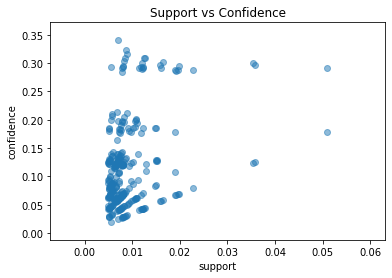

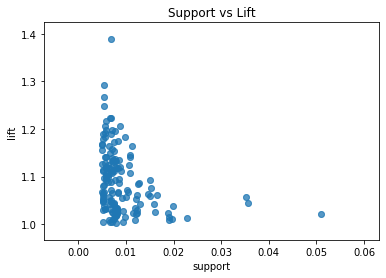

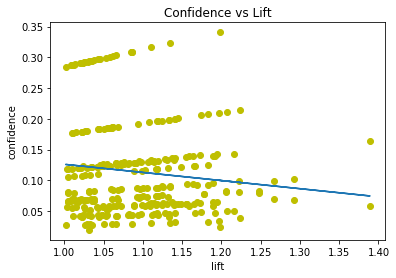

In [15]:
print_plt(rules_all_stores)

### 1.4. Take a Look at Maximal Patterns: Compute Maximal Frequent Itemsets

In [16]:
from mlxtend.frequent_patterns import fpmax

fpmax(ohe_df, min_support=0.25, use_colnames=True)

,support,itemsets
0,0.284461,(Fresh Vegetables)


Write text in cells like this ...


### 1.5 Conclusions from Mining Frequent Patterns in All Stores

- Podemos concluir que 99,5% das compras contêm 3 items ou menos. A maioria das regras com maior confiança contém o artigo fresh vegetables, no entanto o valor máximo de confiança obtido foi aproximadamente 34% o que achamos que não seja um valor muito alto. O valor mais elevado obtido na medida lift foi aproximadamente 1.4 relativamente a quem compra cheese acaba por comprar tambem deli salads. Uma vez que o valor distancia se ligeiramente de 1 podemos afirmar que a compra destes artigos é dependente. A regra com maior valor tanto de confiança como de lift é quem compra sopa e fresh fruit compra também fresh vegetables. Presumimos que a dependência destes artigos esteja relacionada com o motivo de normalmente estarem próximos. Outra conclusão evidente é que fresh vegetables é um dos artigos mais comprados.

## 2. Mining Frequent Itemsets and Association Rules: Looking for Differences between Stores

The 24 stores, whose transactions were analysed in Task 1, are in fact **different types of stores**:
* Deluxe Supermarkets: STORE_ID = 8, 12, 13, 17, 19, 21
* Gourmet Supermarkets: STORE_ID = 4, 6
* Mid-Size Grocerys: STORE_ID = 9, 18, 20, 23
* Small Grocerys: STORE_ID = 2, 5, 14, 22
* Supermarkets: STORE_ID = 1, 3, 7, 10, 11, 15, 16

In this context, in this second task you should compute frequent itemsets and association rules for specific groups of stores, and then compare the store specific results with those obtained when all transactions were analysed independently of the type of store. 

**The goal is to find similarities and differences in buying patterns according to the types of store. Do popular products change? Are there buying patterns specific to the type of store?**

In [17]:
df[0] = df[0].str.split(r'=').str[1]


In [18]:
deluxe_df = df.loc[(df[0].isin(['8','12', '13', '17', '19', '21']))].sort_values(by=0).reset_index(drop=True)
gourmet_df = df.loc[(df[0].isin(['4','6']))].sort_values(by=0).reset_index(drop=True)
mid_size_df = df.loc[(df[0].isin(['9','18', '20', '23']))].sort_values(by=0).reset_index(drop=True)
small_df = df.loc[(df[0].isin(['2','5', '14', '22']))].sort_values(by=0).reset_index(drop=True)
supermarket_df = df.loc[(df[0].isin(['1', '3', '7', '10', '11', '15',' 16']))].sort_values(by=0).reset_index(drop=True)
#deluxe_gourmet_df = df.loc[(df[0].isin(['8','12', '13', '17', '19', '21', '4', '6']))].sort_values(by=0).reset_index(drop=True)

In [19]:
deluxe_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,12,Preserves,Hot Dogs,Cooking Oil,Lightbulbs,None,None,None,None,None,None,None,None,None
1,12,Eggs,Waffles,None,None,None,None,None,None,None,None,None,None,None
2,12,Popsicles,Crackers,None,None,None,None,None,None,None,None,None,None,None
3,12,Preserves,Anchovies,None,None,None,None,None,None,None,None,None,None,None
4,12,Flavored Drinks,Bologna,Fresh Fruit,Dried Fruit,Pretzels,Canned Fruit,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25919,8,Spices,None,None,None,None,None,None,None,None,None,None,None,None
25920,8,Personal Hygiene,Peanut Butter,None,None,None,None,None,None,None,None,None,None,None
25921,8,Plastic Utensils,None,None,None,None,None,None,None,None,None,None,None,None
25922,8,Hard Candy,Jam,Deli Meats,Personal Hygiene,Fresh Fruit,Dried Fruit,Juice,Ice Cream,None,None,None,None,None


### 2.1. Analyse Deluxe Supermarkets and Gourmet Supermarkets

Here you should analyse transactions from **Deluxe Supermarkets (STORE_ID = 8, 12, 13, 17, 19, 21) and Gourmet Supermarkets (STORE_ID = 4, 6) together**.

#### 2.1.1. Load/Preprocess the Dataset

**You might need to change a bit the preprocessing, although most of it should be reused.**

In [20]:
deluxe_gourmet_df = deluxe_df.append(gourmet_df).reset_index(drop = True)
'''def encode_df(df):
    aux = df[1]
    for x in range(2,len(df.columns)):

        aux = aux.append(df[x])

    aux =  list(dict.fromkeys(aux))
    if None in aux: aux.remove(None)

    return pd.DataFrame(aux)
df_encoded_deluxe = encode_df(deluxe_gourmet_df)

def custom(df):
    
    encoded_vals = []
    for index, row in df.iterrows():
        labels = {}
        uncommons = list(set(aux) - set(row))
        commons = list(set(aux).intersection(row))
        for uc in uncommons:
            labels[uc] = 0
        for com in commons:
            labels[com] = 1
        encoded_vals.append(labels)
    encoded_vals[0]
    ohe_df = pd.DataFrame(encoded_vals)
    
    return ohe_df'''

#ohe_deluxe_gourmet = custom(df_encoded_deluxe)

aux = deluxe_gourmet_df[1]
for x in range(2,14):
    aux = aux.append(deluxe_gourmet_df[x])
    
aux =  list(dict.fromkeys(aux))
aux.remove(None)

df_test = pd.DataFrame(aux)

ohe_deluxe_gourmet = custom(deluxe_gourmet_df)

In [21]:
#ohe_deluxe_gourmet

Write text in cells like this ...


#### 2.1.2. Compute Frequent Itemsets

**This should be trivial now.**

In [22]:
frequent_itemset = frequent_itemsets(ohe_deluxe_gourmet,0.05)
frequent_itemset.sort_values(by = ["length","support"], ascending = False)

,support,itemsets,length
31,0.051805,"(Fresh Fruit, Fresh Vegetables)",2
19,0.290061,(Fresh Vegetables),1
0,0.176277,(Fresh Fruit),1
1,0.121368,(Soup),1
6,0.119384,(Dried Fruit),1
7,0.117976,(Cheese),1
21,0.106169,(Cookies),1
26,0.079163,(Paper Wipes),1
17,0.077915,(Wine),1
22,0.076123,(Canned Vegetables),1


In [23]:
frequent_itemset = frequent_itemsets(ohe_deluxe_gourmet,0.005)
frequent_itemset.sort_values(by = ["length","support"], ascending = False)

,support,itemsets,length
370,0.008063,"(Fresh Fruit, Soup, Fresh Vegetables)",3
372,0.006080,"(Fresh Fruit, Cookies, Fresh Vegetables)",3
371,0.005344,"(Fresh Fruit, Cheese, Fresh Vegetables)",3
373,0.005024,"(Fresh Fruit, Paper Wipes, Fresh Vegetables)",3
138,0.051805,"(Fresh Fruit, Fresh Vegetables)",2
...,...,...,...
71,0.013119,(Sardines),1
52,0.012991,(Shrimp),1
55,0.012927,(Pots and Pans),1
88,0.012863,(Candles),1


Write text in cells like this ...


#### 2.1.3. Generate Association Rules from Frequent Itemsets

**This should be trivial now.**

In [24]:
rules = association_rules(frequent_itemset, metric="confidence", min_threshold=0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nasal Sprays),(Fresh Vegetables),0.025982,0.290061,0.007680,0.295567,1.018979,0.000143,1.007815
1,(Fresh Fruit),(Soup),0.176277,0.121368,0.022399,0.127065,1.046936,0.001004,1.006526
2,(Soup),(Fresh Fruit),0.121368,0.176277,0.022399,0.184550,1.046936,0.001004,1.010146
3,(Rice),(Fresh Fruit),0.031390,0.176277,0.006720,0.214067,1.214382,0.001186,1.048084
4,(Fresh Fruit),(Eggs),0.176277,0.065148,0.009983,0.056635,0.869324,-0.001501,0.990976
...,...,...,...,...,...,...,...,...,...
446,(Cookies),"(Fresh Fruit, Fresh Vegetables)",0.106169,0.051805,0.006080,0.057263,1.105371,0.000580,1.005790
447,"(Fresh Fruit, Paper Wipes)",(Fresh Vegetables),0.015551,0.290061,0.005024,0.323045,1.113713,0.000513,1.048724
448,"(Fresh Fruit, Fresh Vegetables)",(Paper Wipes),0.051805,0.079163,0.005024,0.096973,1.224985,0.000923,1.019723
449,"(Paper Wipes, Fresh Vegetables)",(Fresh Fruit),0.023423,0.176277,0.005024,0.214481,1.216728,0.000895,1.048636


In [25]:
rules = association_rules(frequent_itemset, metric="lift", min_threshold=1.0)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nasal Sprays),(Fresh Vegetables),0.025982,0.290061,0.007680,0.295567,1.018979,0.000143,1.007815
1,(Fresh Vegetables),(Nasal Sprays),0.290061,0.025982,0.007680,0.026475,1.018979,0.000143,1.000507
2,(Fresh Fruit),(Soup),0.176277,0.121368,0.022399,0.127065,1.046936,0.001004,1.006526
3,(Soup),(Fresh Fruit),0.121368,0.176277,0.022399,0.184550,1.046936,0.001004,1.010146
4,(Fresh Fruit),(Rice),0.176277,0.031390,0.006720,0.038119,1.214382,0.001186,1.006996


In [26]:
rules[(rules['confidence'] > 0.2) & (rules['lift'] > 1.0)]
rules_dl = rules

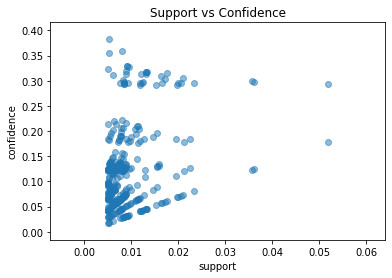

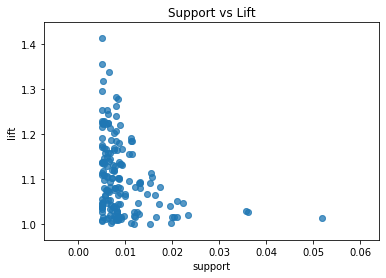

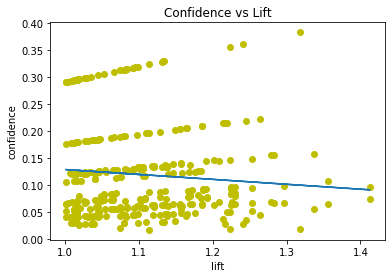

In [27]:
print_plt(rules_dl)

Write text in cells like this 


#### 2.1.4.  Deluxe/Gourmet Supermarkets versus All Stores

Discuss the similarities and diferences between the results obtained in task 1. (frequent itemsets and association rules found in transactions from all stores) and those obtained above (frequent itemsets and association rules found in transactions only from Deluxe/Gourmet Supermarkets).

- Com recurso à tabela cima que representa os items frequentes com support minimo de 0.05, é possivel afirmar que os fresh vegetables são novamente o artigo com um valor de support mais elevado e que o primeiro itemset com tamanho igual a 2 tem um support de 0.051805 que admitimos ser um pouco baixo. Este é composto pelos seguintes artigos: fresh fruit e fresh vegetables.Uma vez que este é o unico set com tamanho 2 as associações rules são geradas apenas com o items mencionados anteriormente. A regra que apresenta maior valor de confiança é quem compra fresh fruit vai comprar também fresh vegetables. aproximadamente 30%. Concluimos novamente que como o valor de lift se situa ao redor de 1 podemos admitir que os artigos teem alguma dependência entre si.

- Podemos ainda concluir que o artigo fresh vegetable está associado a items de várias variedades, tanto em todas as lojas assim como nas gourmet e deluxe.

Write text in cells like this 


### 2.2. Analyse Small Groceries [For groups of 2 and 3]

Here you should analyse **Small Groceries (STORE_ID = 2, 5, 14, 22)**.

#### 2.2.1.  Load/Preprocess the Dataset

**This should be trivial now.**

In [28]:
aux = small_df[1]
for x in range(2,14):
    aux = aux.append(small_df[x])
    
aux =  list(dict.fromkeys(aux))
aux.remove(None)

df_test = pd.DataFrame(aux)
small_df_ohe = custom(small_df)

In [29]:
print("Nº de Items:", len(aux))
print("Nº de Entradas:", len(small_df_ohe))

Nº de Items: 102
Nº de Entradas: 2278


#### 2.2.2. Compute Frequent Itemsets

In [30]:
frequent_itemset = frequent_itemsets(small_df_ohe,0.1)
frequent_itemset.sort_values(by=['length','support'], ascending = False).head(10)

,support,itemsets,length
4,0.286655,(Fresh Vegetables),1
0,0.178665,(Fresh Fruit),1
1,0.119842,(Soup),1
3,0.119842,(Cheese),1
2,0.107989,(Dried Fruit),1
5,0.107550,(Cookies),1


Com support superior a 10% não existem conjuntos com mais de 1 elemento. 

Os conjuntos com maior procura são:

- "Fresh Vegetables" que aparecem em 28.67% das compras ;
- Fresh Fruit" em 17,87%
- "Soup" em 11,99%

De seguida iremos repetir o processo com um support inferior para tentar detectar os produtos que são mais comprados em conjunto. 

In [31]:
frequent_itemset = frequent_itemsets(small_df_ohe,0.01)
frequent_itemset.sort_values(by=['length','support'], ascending = False).head(10)

,support,itemsets,length
112,0.046532,"(Fresh Fruit, Fresh Vegetables)",2
122,0.038630,"(Soup, Fresh Vegetables)",2
130,0.035119,"(Fresh Vegetables, Dried Fruit)",2
135,0.035119,"(Cheese, Fresh Vegetables)",2
172,0.025900,"(Cookies, Fresh Vegetables)",2
163,0.024583,"(Canned Vegetables, Fresh Vegetables)",2
102,0.023705,"(Fresh Fruit, Dried Fruit)",2
168,0.023705,"(Paper Wipes, Fresh Vegetables)",2
154,0.023266,"(Fresh Vegetables, Wine)",2
125,0.022827,"(Fresh Vegetables, Chocolate Candy)",2


Com support superior a 1% apenas existem conjuntos que contém até 2 elementos. 

Os conjuntos que contém 2 elementos com maior procura são:
- **"Fresh Vegetables" em conjunto com as "Fresh Fruits" que aparecem em 4.65%** das compras ;
- **"Soup" e "Fresh Vegetables" em 3,86%** ;
- **"Dried Fruit" e "Fresh Vegetables" em 3,51%** . 

Apesar de ser um support baixo, iremos baixar ainda mais de forma a tentar encontrar conjuntos com mais de dois elementos.

In [32]:
frequent_itemset = frequent_itemsets(small_df_ohe,0.005)
frequent_itemset.sort_values(by=['length','support'], ascending = False).head(10)

,support,itemsets,length
407,0.007902,"(Paper Wipes, Fresh Fruit, Fresh Vegetables)",3
406,0.007463,"(Fresh Fruit, Fresh Vegetables, Dried Fruit)",3
408,0.006585,"(Fresh Fruit, Cookies, Fresh Vegetables)",3
405,0.006146,"(Fresh Fruit, Soup, Fresh Vegetables)",3
409,0.006146,"(Soup, Cheese, Fresh Vegetables)",3
412,0.006146,"(Cheese, Fresh Vegetables, Dried Fruit)",3
410,0.005707,"(Soup, Fresh Vegetables, Cookies)",3
411,0.005268,"(Paper Wipes, Fresh Vegetables, Chocolate Candy)",3
141,0.046532,"(Fresh Fruit, Fresh Vegetables)",2
176,0.038630,"(Soup, Fresh Vegetables)",2


Os conjuntos de 3 elementos encontrados com maior support foram:
- "Fresh Vegetables", "Fresh Fruit" e "Paper Wipes" com support de 0,79%	
- "Dried Fruit", "Fresh Vegetables" e "Fresh Fruit" com support de 0,75%
- "Fresh Vegetables", "Fresh Fruit" e "Cookies" com support de 0,66%

Ambos contém os elementos "Fresh Vegetables" e "Fresh Fruit" que são os elementos que também contém maior support em conjunto e individualmente. 

#### 2.2.3. Generate Association Rules from Frequent Itemsets

In [33]:
rules = association_rules(frequent_itemset, metric="lift", min_threshold=0.01)
rules.sort_values(by = "lift", ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
642,"(Paper Wipes, Fresh Vegetables)",(Chocolate Candy),0.023705,0.072432,0.005268,0.222222,3.068013,0.003551,1.192587
647,(Chocolate Candy),"(Paper Wipes, Fresh Vegetables)",0.072432,0.023705,0.005268,0.072727,3.068013,0.003551,1.052867
645,(Paper Wipes),"(Fresh Vegetables, Chocolate Candy)",0.078139,0.022827,0.005268,0.067416,2.953328,0.003484,1.047812
644,"(Fresh Vegetables, Chocolate Candy)",(Paper Wipes),0.022827,0.078139,0.005268,0.230769,2.953328,0.003484,1.198420
390,(Pizza),(Ice Cream),0.052239,0.042142,0.005268,0.100840,2.392857,0.003066,1.065281
391,(Ice Cream),(Pizza),0.042142,0.052239,0.005268,0.125000,2.392857,0.003066,1.083156
236,(Cold Remedies),(Canned Vegetables),0.028973,0.082090,0.005268,0.181818,2.214876,0.002889,1.121891
237,(Canned Vegetables),(Cold Remedies),0.082090,0.028973,0.005268,0.064171,2.214876,0.002889,1.037612
620,"(Fresh Fruit, Fresh Vegetables)",(Paper Wipes),0.046532,0.078139,0.007902,0.169811,2.173203,0.004266,1.110424
621,(Paper Wipes),"(Fresh Fruit, Fresh Vegetables)",0.078139,0.046532,0.007902,0.101124,2.173203,0.004266,1.060733


In [34]:
rules = association_rules(frequent_itemset, metric="confidence", min_threshold=0.01)
rules.sort_values(by = "confidence", ascending = False).head(10)

rules_small = rules

O support para a afirmação é baixo (0.92%) mas segundo os dados podemos afirmar com confiança de 57.14% que quem leva "Chocolate Candy" e "Paper Wipes" também irá levar "Fresh Vegetables". O lift desta relação é alto o que significa que aparecem mais vezes juntos do que é esperado isto talvez aconteça devido ao suport ser baixo, como já foi referido anteriormente.

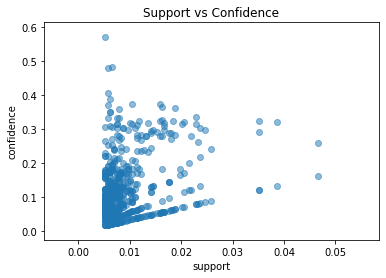

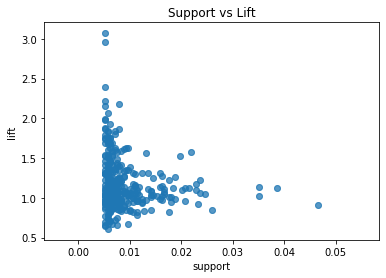

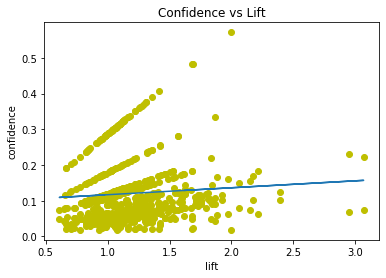

In [35]:
print_plt(rules_small)

#### 2.2.4 Small Groceries versus All Stores

Discuss the similarities and diferences between the results obtained in task 1. (frequent itemsets and association rules found in transactions from all stores) and those obtained above (frequent itemsets and association rules found in transactions only Small Groceries).

Com recurso às tabelas dos `items frequentes`, podemos verificar que os conjuntos de elementos unicos mais frequente são os mesmos e com percentagens bastante semelhantes. 

- Small Groceries:
    - 28,67% Fresh Vegetables
    - 17,87% Fresh Fruit
    - 11,98% Soup


- All Stores:
    - 28,44% Fresh Vegetables
    - 17,53% Fresh Fruit
    - 12,01% Soup

Quanto aos conjuntos com dois items o TOP 3 dos mais comprados em conjuntos são os mesmos em comparação com todos os supermercados apesar de o conjunto dos "Fresh Vegetables" e "Fresh Fruit" ter uma percentagem ligeiramente inferior nas Small Groceries.


- Small Groceries:
    - 4,65%	"Fresh Vegetables" e "Fresh Fruit"
    - 3,86%	"Soup" e "Fresh Vegetables"
    - 3,51%	"Dried Fruit" e "Fresh Vegetables"


- All Stores:
    - 5,10%	"Fresh Vegetables" e "Fresh Fruit"
    - 3,57%	"Soup" e "Fresh Vegetables"	
    - 3,53%	"Dried Fruit" e "Fresh Vegetables"

Para 3 items no mesmo conjunto o Top 3 difere apenas tendo em comum o conjunto "Fresh Vegetables", "Fresh Fruit" e "Cookies",  desta forma não é possivel tirar grandes conclusões devido ao valor de suport ser muito baixo (inferior a 1%), apenas que este conjunto é um dos mais frequentes tanto nas Small Groceries como nas outras lojas.


- Small Groceries:
    - 0,79%	"Fresh Vegetables", "Fresh Fruit" e "Paper Wipes"
    - 0,75%	"Dried Fruit", "Fresh Vegetables" e "Fresh Fruit"
    - 0,66%	"Fresh Vegetables", "Fresh Fruit" e "Cookies"


- All Stores:
    - 0,70%	"Soup", "Fresh Vegetables" e "Fresh Fruit"
    - 0,55%	"Fresh Vegetables", "Fresh Fruit" e "Cookies"
    - 0,53%	"Cheese", "Fresh Vegetables" e "Fresh Fruit"


Quanto a `Association Rules` é possivel verificar as seguintes regras com maior nivel de confiança:


- Small Groceries:
    - ("Chocolate Candy", "Paper Wipes") --> (Fresh Vegetables) Confiança de: 57,14%, Lift: 1.99
    - ("Ibuprofen") --> ("Fresh Vegetables") Confiança de: 48,39%, Lift: 1.69
    - ("Clams") --> ("Fresh Vegetables") Confiança de: 48,15%, Lift: 1.68


- All Stores:
    - (Soup, Fresh Fruit) --> (Fresh Vegetables) Confiança de : 34,07% Lift: 1.20
    - (Aspirin) --> (Fresh Vegetables) Confiança de : 32,29% Lift: 1.14
    - (Hamburger) --> (Fresh Vegetables) Confiança de : 31,61% Lift: 1.11

As regras são diferentes e as das "All Stores" têm um lift muito próximo de 1 que mostra as regras de associação têm pouca correlação entre os predicados.

- All Stores:
    - (Rice) --> (Fresh Fruit)        Confiança: 21.45%    Lift: 1.22
    - (TV Dinner) --> (Fresh Fruit)   Confiança: 21.16%    Lift: 1.21
    
A relação entre os predicados não melhora muito mas é ligeiramente superior e com um decrescimo enorme da confiança.

Para estes "antecedents" não existem regras satisfatórias para realizar comparações. Podemos concluir que em termos de items frequentes as "Small Groceries" são semelhantes às outras lojas mas não em termos de regras a aplicar.

### 2.3.  Deluxe/Gourmet Supermarkets versus Small Groceries  [For groups of 2 and 3]

Discuss the similarities and diferences between the results obtained in task 2.1. (frequent itemsets and association rules found in transactions only from Deluxe/Gourmet Supermarkets) and those obtained in task 2.2. (frequent itemsets and association rules found in transactions only Small Groceries).

Com recurso às tabelas dos `items frequentes`, podemos verificar que os conjuntos de elementos unicos mais frequente são os mesmos e com percentagens bastante semelhantes. 

- Small Groceries:
    - 28,67% Fresh Vegetables
    - 17,87% Fresh Fruit
    - 11,98% Soup


- Deluxe/Gourmet:
    - 29,01% Fresh Vegetables
    - 17,63% Fresh Fruit
    - 12,14% Soup

Quanto aos conjuntos com dois items o TOP 3 dos mais comprados em conjuntos são os mesmos em comparação com todos os supermercados apesar de o conjunto dos "Fresh Vegetables" e "Fresh Fruit" ter uma percentagem ligeiramente inferior nas Small Groceries.


- Small Groceries:
    - 4,65%	"Fresh Vegetables" e "Fresh Fruit"
    - 3,86%	"Soup" e "Fresh Vegetables"
    - 3,51%	"Dried Fruit" e "Fresh Vegetables"


- Deluxe/Gourmet:
    - 5,18%	"Fresh Vegetables" e "Fresh Fruit"
    - 3,62%	"Soup" e "Fresh Vegetables"	
    - 3,57%	"Dried Fruit" e "Fresh Vegetables"

Para 3 items no mesmo conjunto o Top 3 difere apenas tendo em comum o conjunto "Fresh Vegetables", "Fresh Fruit" e "Cookies",  desta forma não é possivel tirar grandes conclusões devido ao valor de suport ser muito baixo (inferior a 1%), apenas que este conjunto é um dos mais frequentes tanto nas Small Groceries como nas Deluxe/Gourmet.


- Small Groceries:
    - 0,79%	"Fresh Vegetables", "Fresh Fruit" e "Paper Wipes"
    - 0,75%	"Dried Fruit", "Fresh Vegetables" e "Fresh Fruit"
    - 0,66%	"Fresh Vegetables", "Fresh Fruit" e "Cookies"


- Deluxe/Gourmet:
    - 0,81%	"Soup", "Fresh Vegetables" e "Fresh Fruit"
    - 0,61%	"Fresh Vegetables", "Fresh Fruit" e "Cookies"
    - 0,54%	"Cheese", "Fresh Vegetables" e "Fresh Fruit"


Quanto a `Association Rules` é possivel verificar as seguintes regras com maior nivel de confiança:


- Small Groceries:
    - ("Chocolate Candy", "Paper Wipes") --> (Fresh Vegetables) Confiança de: 57,14%, Lift: 1.99
    - ("Ibuprofen") --> ("Fresh Vegetables") Confiança de: 48,39%, Lift: 1.69
    - ("Clams") --> ("Fresh Vegetables") Confiança de: 48,15%, Lift: 1.68


- Deluxe/Gourmet:
    - (Fresh Vegetables) --> (Fresh Fruit) Confiança de : 17,86% Lift: 1.013174
    - (Fresh Fruit) --> (Fresh Vegetables) Confiança de : 29.39% Lift: 1.013174
